Import needed libraries and working file "GEI_Org.csv"

In [5]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, model_selection
from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report

# Load the GEI dataset from the CSV file
GEI = pd.read_csv("GEI_Org.csv", encoding='latin1')  # Assuming 'latin1' encoding

# Display the first few rows of the dataset
GEI.head()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(GEI)

,Greenhouse gas emissions,Freshwater eutrophication,Ionising radiation,Water use,Metal and mineral requirements,Non-carcinogenic toxicity,Carcinogenic toxicity,Total land use,Aluminium,Chromium,Cobalt,Copper,Manganese,Molybdenum,Nickel,Silicon,Zinc,Uranium,Death rates,Entity
0,970.0,569,4.6,120,0.41,67.182006,5.641833,14.879552,8.715592e+01,6.978965,0.108972,23.615982,32.120750,0.535186,22.269538,5.152622,5.385992,0.165988,0.121043,Coal
1,294.0,803,7.2,214,0.62,100.765166,8.036336,21.056662,1.259268e+02,12.101164,0.169207,38.385817,47.389751,0.867456,33.796795,8.019610,8.694418,0.260518,0.036687,Coal with carbon capture (CCS)
2,36.0,16,3.7,14,0.49,3.997340,3.102176,19.905026,4.566615e+01,2.777962,0.069426,16.714524,68.956149,0.572828,61.671754,3.726307,4.786800,0.115540,0.004492,Concentrating solar (tower)
3,56.0,17,6.2,20,0.82,5.996898,8.010367,18.303697,1.389135e+02,302.221742,0.051753,21.627109,41.651278,0.556991,18.867518,2.665372,8.556139,0.149231,0.006988,Concentrating solar (trough)
4,439.0,12,3.8,45,0.19,10.491073,1.707698,1.038785,6.974503e+00,1.652092,0.025787,11.062147,14.955699,0.261005,7.128888,1.321724,1.929939,0.182801,0.054781,Gas
5,134.0,14,4.8,79,0.25,16.518346,2.113575,1.267329,9.425187e+00,2.616414,0.035481,14.502530,18.729712,0.340246,9.299220,1.802503,2.611412,0.222536,0.016721,Gas with carbon capture (CCS)
6,117.0,10,9.2,13,0.48,17.201634,2.027133,33.388143,1.059268e+01,0.566220,0.005484,2.313141,3.891383,0.053515,2.298588,0.290326,2.833242,0.005680,0.014600,Hydropower
7,5.6,6,14.0,132,0.34,5.547858,0.556148,0.329269,6.730000e-07,7.206686,0.043817,20.873814,2.911532,0.444580,4.483992,2.271279,7.110832,29.214091,0.000699,Nuclear
8,17.0,8,1.3,8,1.14,3.709392,6.442778,NaN,3.128835e+01,60.956105,0.094323,42.784594,60.460229,1.365799,68.087829,5.097327,21.518107,0.029771,0.002121,Offshore wind
9,11.0,6,0.8,7,0.59,2.589179,5.691850,NaN,4.839935e+01,67.243894,0.084339,31.660200,53.805235,1.001956,66.315797,4.561034,3.349423,0.030814,0.001373,Onshore wind


##Split the training and test data for both X and y

In [6]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer
# Assuming 'Tasa de mortalidad' is the target column
X = GEI.drop(columns=['Death rates'])
X = GEI.drop(columns=['Entity'])
y = GEI[['Death rates']]  # Selecting the target column as a DataFrame

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute NaN values using the mean of "Total land use" column
imputer = SimpleImputer(strategy='mean') # You can change the strategy if needed
X_train = imputer.fit_transform(X_train) # Fit and transform on the training data
X_test = imputer.transform(X_test) # Transform the test data using the fitted imputer

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(GEI)

,Greenhouse gas emissions,Freshwater eutrophication,Ionising radiation,Water use,Metal and mineral requirements,Non-carcinogenic toxicity,Carcinogenic toxicity,Total land use,Aluminium,Chromium,Cobalt,Copper,Manganese,Molybdenum,Nickel,Silicon,Zinc,Uranium,Death rates,Entity
0,970.0,569,4.6,120,0.41,67.182006,5.641833,14.879552,8.715592e+01,6.978965,0.108972,23.615982,32.120750,0.535186,22.269538,5.152622,5.385992,0.165988,0.121043,Coal
1,294.0,803,7.2,214,0.62,100.765166,8.036336,21.056662,1.259268e+02,12.101164,0.169207,38.385817,47.389751,0.867456,33.796795,8.019610,8.694418,0.260518,0.036687,Coal with carbon capture (CCS)
2,36.0,16,3.7,14,0.49,3.997340,3.102176,19.905026,4.566615e+01,2.777962,0.069426,16.714524,68.956149,0.572828,61.671754,3.726307,4.786800,0.115540,0.004492,Concentrating solar (tower)
3,56.0,17,6.2,20,0.82,5.996898,8.010367,18.303697,1.389135e+02,302.221742,0.051753,21.627109,41.651278,0.556991,18.867518,2.665372,8.556139,0.149231,0.006988,Concentrating solar (trough)
4,439.0,12,3.8,45,0.19,10.491073,1.707698,1.038785,6.974503e+00,1.652092,0.025787,11.062147,14.955699,0.261005,7.128888,1.321724,1.929939,0.182801,0.054781,Gas
5,134.0,14,4.8,79,0.25,16.518346,2.113575,1.267329,9.425187e+00,2.616414,0.035481,14.502530,18.729712,0.340246,9.299220,1.802503,2.611412,0.222536,0.016721,Gas with carbon capture (CCS)
6,117.0,10,9.2,13,0.48,17.201634,2.027133,33.388143,1.059268e+01,0.566220,0.005484,2.313141,3.891383,0.053515,2.298588,0.290326,2.833242,0.005680,0.014600,Hydropower
7,5.6,6,14.0,132,0.34,5.547858,0.556148,0.329269,6.730000e-07,7.206686,0.043817,20.873814,2.911532,0.444580,4.483992,2.271279,7.110832,29.214091,0.000699,Nuclear
8,17.0,8,1.3,8,1.14,3.709392,6.442778,NaN,3.128835e+01,60.956105,0.094323,42.784594,60.460229,1.365799,68.087829,5.097327,21.518107,0.029771,0.002121,Offshore wind
9,11.0,6,0.8,7,0.59,2.589179,5.691850,NaN,4.839935e+01,67.243894,0.084339,31.660200,53.805235,1.001956,66.315797,4.561034,3.349423,0.030814,0.001373,Onshore wind


##Select the model and fit it with the training data

In [7]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, model_selection
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the GEI dataset from the CSV file
GEI = pd.read_csv("GEI_Org.csv", encoding='latin1')

# Assuming 'Tasa de mortalidad' is the target column
X = GEI.drop(columns=['Death rates'])
X = GEI.drop(columns=['Entity'])
y = GEI[['Death rates']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute NaN values using the mean of "Total land use" column
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create linear regression object and fit it with the training
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Use test data to predict a line

In [8]:
y_pred = model.predict(X_test)

## Calculo manual del error cuadratico medio(mse) y error medio absoluto (mae) y raiz de mse (rmse)

In [17]:
#Calculo del error cuadratico medio(mse)
def mse(y_test, y_pred):
    mse = np.mean((y_test - y_pred)**2)
    print("mse =", mse)
#Calculo del error medio absoluto(mae)
def mae(y_test, y_pred):
    mae = np.mean(np.abs(y_test - y_pred))
    print("mae =", mae)
# Calculate the Root Mean Squared Error (RMSE)
def rmse(y_test, y_pred):
    return np.sqrt(np.mean((y_test - y_pred)**2))
    print("rmse =", rmse)

## Calculo de R^2 (Coefcente de dterminación): Se calcula dividiendo el error cuadrático medio residual por el error cuadrático total


In [14]:
# Calculate the mean of the actual values
def calculate_r_squared(y_test, y_pred): # define a function to group the calculations
    y_mean = np.mean(y_test)

    # Calculate the total sum of squares (TSS)
    tss = np.sum((y_test - y_mean)**2)

    # Calculate the residual sum of squares (RSS)
    rss = np.sum((y_test - y_pred)**2)

    # Calculate R-squared
    r_squared = 1 - (rss / tss)

    print("R^2 =", r_squared) # print the R-squared value

## Calculo de los errores porcentuales

Tarea completar calculo de mse y r2
Calculo de r2 de manera manual=
errores porcentuales
histograma de errores
1. Regresion lineal: errores porcentuales, histograma errores

##Histograma de errores

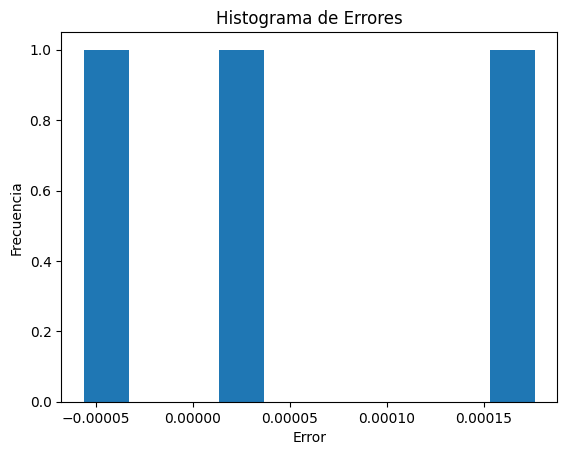

Text(0.5, 1.0, 'histograma de las diferencias')

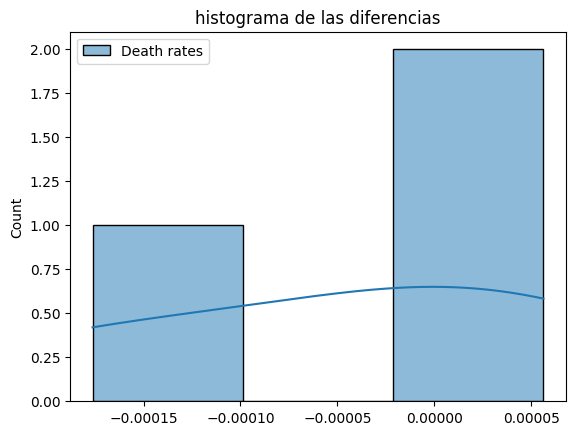

In [21]:
import matplotlib.pyplot as plt # Import matplotlib.pyplot
import seaborn as sns # Import seaborn and alias it as sns

# mostrar histograma e errores
error = y_pred - y_test
plt.hist(error, bins=10)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Histograma de Errores')
plt.show()

# Otra forma mas ordenada de mostrar histogramas
# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
sns.histplot(y_test - y_pred, kde=True) # Now sns is defined and can be used
plt.rcParams["figure.figsize"] = (10, 6)  # Custom figure size in inches
plt.title("histograma de las diferencias")

(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([-1.76292372e-04, -1.53027100e-04, -1.29761828e-04, -1.06496557e-04,
        -8.32312847e-05, -5.99660128e-05, -3.67007410e-05, -1.34354691e-05,
         9.82980276e-06,  3.30950746e-05,  5.63603465e-05]),
 <BarContainer object of 10 artists>)

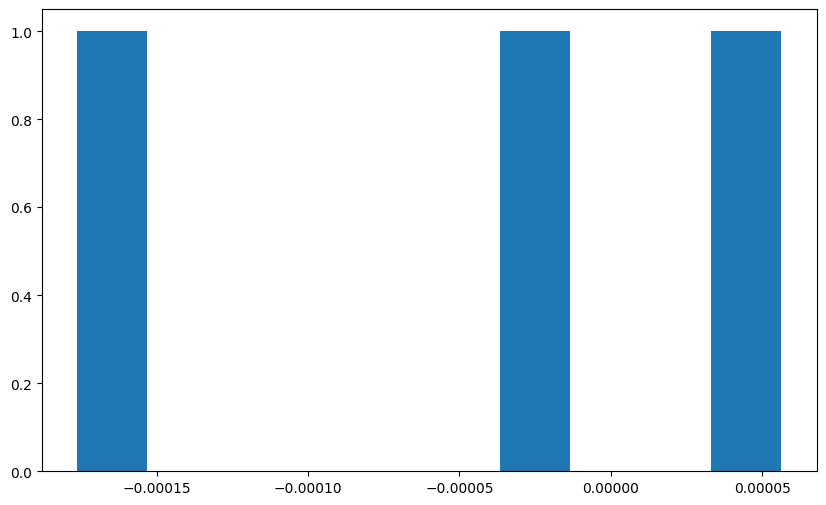

In [31]:
error2 = y_test - y_pred
plt.hist(error2)


Metricas del modelo

In [29]:
print(f"Error Absoluto: {error_abs}")
print(f"Error Cuadratico: {error_sq}")
print(f"mse: {MSE}")
RMSE = MSE**0.5
print(f"RMSE: {RMSE}")
MAE = error_abs.mean()
print(f"MAE: {MAE}")
# Calculate R-squared and assign it to a different variable name (e.g., my_r2_score)
my_r2_score = 1 - (error_sq.sum() / ((y_test - y_test.mean())**2).sum())
print(f"R2: {my_r2_score}")


Error Absoluto:     Death rates
9      0.000016
11     0.000176
0      0.000056
Error Cuadratico:      Death rates
9   2.628593e-10
11  3.107900e-08
0   3.176489e-09
mse: Death rates    1.150612e-08
dtype: float64
RMSE: Death rates    0.000107
dtype: float64
MAE: Death rates    0.000083
dtype: float64
R2: Death rates    1.0
dtype: float64


CURVA ROC

In [30]:
!pip install matplotlib scikit-learn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Example model, change as needed


# Assuming you have X (features) and y (target) data
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model (replace with your actual model)
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values